In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import copy

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python" )
from gaaem_utils import *

In [3]:
data_dir=r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\examples\bhmar-skytem\galeisbstdem\output_nompi"
data_file=r"inversion.output.0000.asc"
data_fullfile=os.path.join(data_dir, data_file)

In [4]:
model=read_GAAEM_data(data_fullfile)

In [5]:
model["flightlines"].shape

(5042, 32)

In [6]:
model["flightlines"].index

RangeIndex(start=0, stop=5042, step=1)

<IPython.core.display.Javascript object>


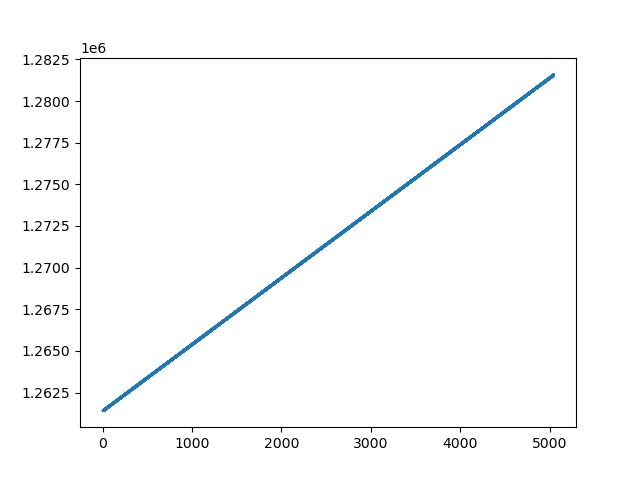

In [7]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].index, model["flightlines"].fiducial, ".-", ms=2)

In [8]:
for c in model["flightlines"].columns:
    print("{0} : {1}".format(c, model["flightlines"].loc[0:4,c].values ))

uniqueid : [0 1 2 3 4]
survey : [1216 1216 1216 1216 1216]
date : [20090803 20090803 20090803 20090803 20090803]
flight : [20090803 20090803 20090803 20090803 20090803]
line : [24000 24000 24000 24000 24000]
fiducial : [1261433. 1261437. 1261441. 1261445. 1261449.]
easting : [603036.5 603042.8 603049.5 603056.2 603062.6]
northing : [6413475.5 6413470.2 6413464.5 6413458.4 6413452.1]
elevation : [68.63 68.64 68.64 68.65 68.65]
tx_height : [27.7 28.4 29.1 29.9 30.7]
tx_roll : [-0.17  1.71  4.28  6.75  8.34]
tx_pitch : [-11.86 -11.5  -11.07 -10.6  -10.07]
tx_yaw : [0. 0. 0. 0. 0.]
txrx_dx : [-12.79 -12.8  -12.8  -12.8  -12.8 ]
txrx_dy : [ 0.01 -0.06 -0.16 -0.25 -0.31]
txrx_dz : [-0.48 -0.4  -0.31 -0.21 -0.1 ]
rx_roll : [-0.17  1.71  4.28  6.75  8.34]
rx_pitch : [-11.86 -11.5  -11.07 -10.6  -10.07]
rx_yaw : [0. 0. 0. 0. 0.]
nlayers : [30 30 30 30 30]
AlphaC : [1. 1. 1. 1. 1.]
AlphaT : [0. 0. 0. 0. 0.]
AlphaG : [1. 1. 1. 1. 1.]
AlphaS : [333. 333. 333. 333. 333.]
PhiD : [1.011277  1.055976 

<IPython.core.display.Javascript object>


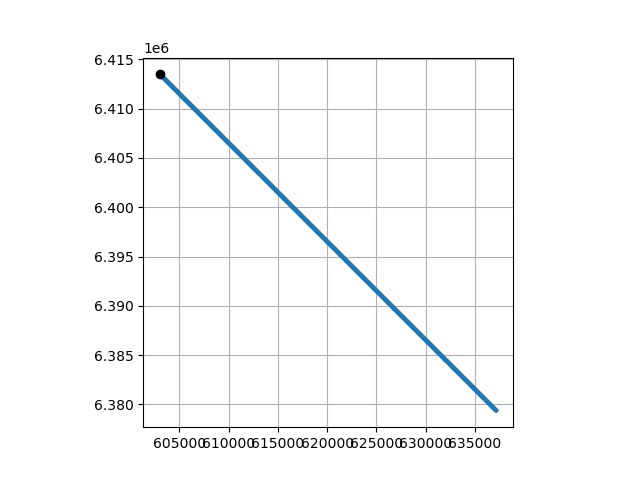

In [9]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].easting, model["flightlines"].northing, ".-", ms=3)
ax.plot(model["flightlines"].easting.iloc[0], model["flightlines"].northing.iloc[0], "ko")

ax.set_aspect("equal")
ax.grid()

In [10]:
model["layer_data"].keys()

dict_keys(['conductivity', 'thickness', 'observed_EMSystem_1_ZS', 'observed_EMSystem_2_ZS', 'noise_EMSystem_1_ZS', 'noise_EMSystem_2_ZS', 'predicted_EMSystem_1_ZS', 'predicted_EMSystem_2_ZS'])

In [11]:
calc_lineOffset(model)

In [12]:
model["flightlines"].columns

Index(['uniqueid', 'survey', 'date', 'flight', 'line', 'fiducial', 'easting',
       'northing', 'elevation', 'tx_height', 'tx_roll', 'tx_pitch', 'tx_yaw',
       'txrx_dx', 'txrx_dy', 'txrx_dz', 'rx_roll', 'rx_pitch', 'rx_yaw',
       'nlayers', 'AlphaC', 'AlphaT', 'AlphaG', 'AlphaS', 'PhiD', 'PhiM',
       'PhiC', 'PhiT', 'PhiG', 'PhiS', 'Lambda', 'Iterations', 'lineoffset'],
      dtype='object')

In [13]:
make_XYZ_model(model)

<IPython.core.display.Javascript object>


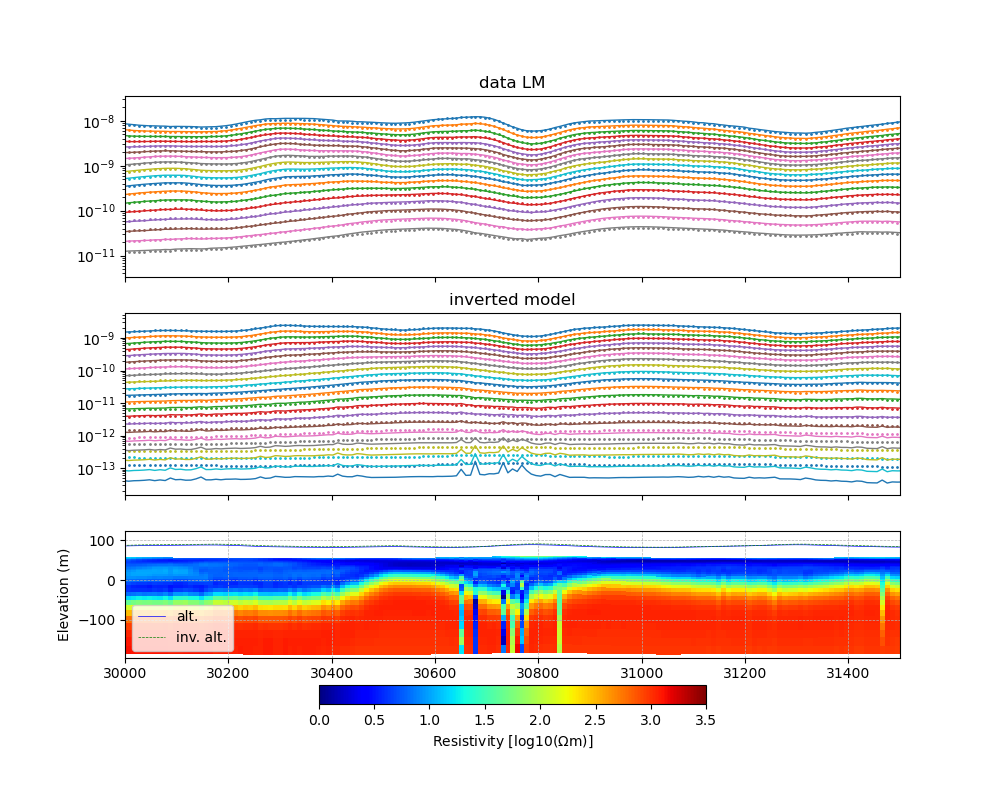

c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python\gaaem_utils\__init__.py:64: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm=ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading='auto', vmin=clim[0], vmax=clim[1] )


(30000.0, 31500.0)

In [14]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_1_ZS"].abs(),
          ".", ms=2,
          label="observed_EMSystem_1_ZS")
ax[0].set_prop_cycle(None)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_1_ZS"].abs(),
          "-", lw=1,
          label="predicted_EMSystem_1_ZS")
ax[0].set_yscale("log")
ax[0].set_title("data LM")

ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_2_ZS"].abs(),
           ".", ms=2,
          label="observed_EMSystem_2_ZS")
ax[1].set_prop_cycle(None)
ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_2_ZS"].abs(),
           "-", lw=1,
          label="predicted_EMSystem_2_ZS")
ax[1].set_yscale("log")
ax[1].set_title("data HM")

plot_model_section(model, ax=ax[2], keyx="lineoffset", hideBelowDOI=False, cb_orientation="horizontal", clim=[0, 3.5])
ax[1].set_title("inverted model")


ax[0].set_xlim([30000, 31500])

<IPython.core.display.Javascript object>


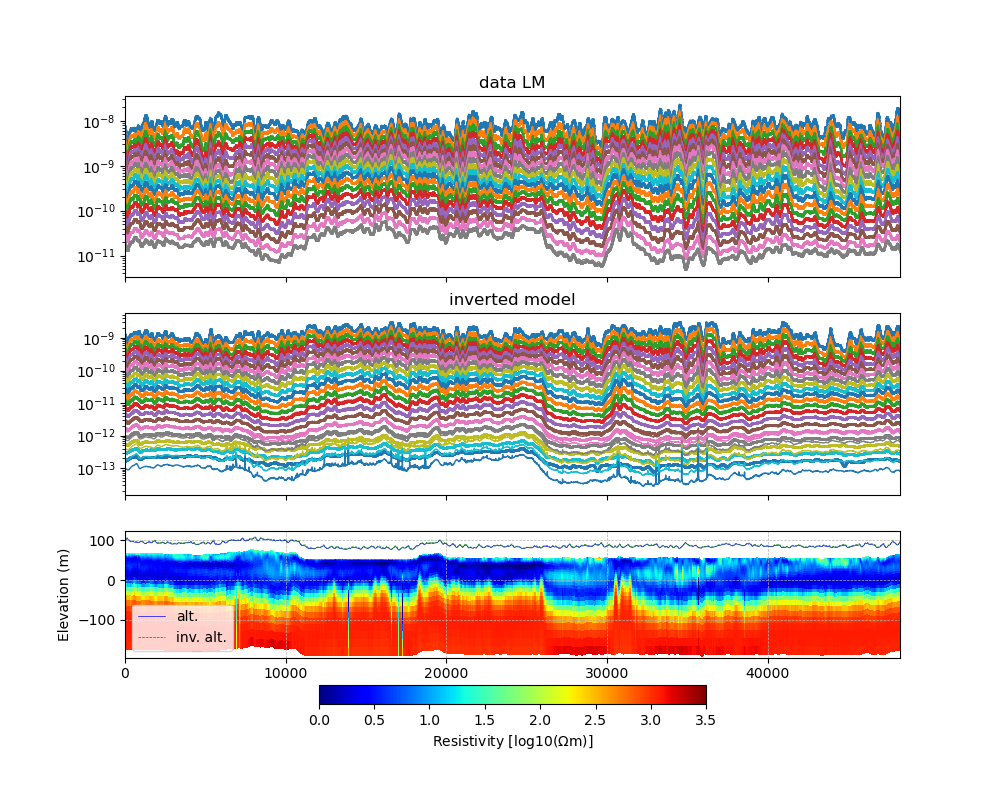

Text(0.5, 1.0, 'inverted model')

In [15]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_1_ZS"].abs(),
          ".", ms=2,
          label="observed_EMSystem_1_ZS")
ax[0].set_prop_cycle(None)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_1_ZS"].abs(),
          "-", lw=1,
          label="predicted_EMSystem_1_ZS")
ax[0].set_yscale("log")
ax[0].set_title("data LM")

ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_2_ZS"].abs(),
           ".", ms=2,
          label="observed_EMSystem_2_ZS")
ax[1].set_prop_cycle(None)
ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_2_ZS"].abs(),
           "-", lw=1,
          label="predicted_EMSystem_2_ZS")
ax[1].set_yscale("log")
ax[1].set_title("data HM")

plot_model_section(model, ax=ax[2], keyx="lineoffset", hideBelowDOI=False, cb_orientation="horizontal", clim=[0, 3.5])
ax[1].set_title("inverted model")

In [16]:
model["layer_data"]["conductivity"].shape

(5042, 30)